<a href="https://colab.research.google.com/github/sarthakR1/docker-python/blob/master/cats_vs_dogs_softsponseraitask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The libraries required are:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("../input/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/test1.zip","r") as z:
    z.extractall(".")

# Any results you write to the current directory are saved as output.

#print(os.listdir("/kaggle/working/train"))

['train.zip', 'test1.zip', 'sampleSubmission.csv']


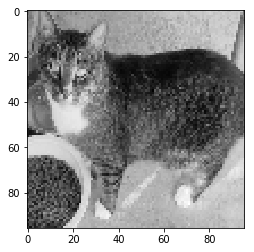

In [ ]:
main_dir = "/kaggle/working/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(96, 96))
    plt.imshow(new_img_array,cmap="gray")
    break

In [ ]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(96, 96))
        X.append(new_img_array)
        y.append(category)
    

In [ ]:
create_test_data(path)
X = np.array(X).reshape(-1, 96,96,1)
y = np.array(y)

In [ ]:
#Normalize data
X = X/255.0

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=X.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
    ])

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 158s 8ms/step - loss: 0.6735 - acc: 0.5694 - val_loss: 0.6131 - val_acc: 0.6530
Epoch 2/20
20000/20000 [==============================] - 158s 8ms/step - loss: 0.5782 - acc: 0.6939 - val_loss: 0.5339 - val_acc: 0.7358
Epoch 3/20
20000/20000 [==============================] - 156s 8ms/step - loss: 0.5048 - acc: 0.7513 - val_loss: 0.4821 - val_acc: 0.7754
Epoch 4/20
20000/20000 [==============================] - 155s 8ms/step - loss: 0.4601 - acc: 0.7862 - val_loss: 0.4318 - val_acc: 0.7998
Epoch 5/20
20000/20000 [==============================] - 157s 8ms/step - loss: 0.4292 - acc: 0.8001 - val_loss: 0.4352 - val_acc: 0.7946
Epoch 6/20
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3929 - acc: 0.8180 - val_loss: 0.3977 - val_acc: 0.8154
Epoch 7/20
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3624 - acc: 0.8369 - val_loss: 0.3912 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


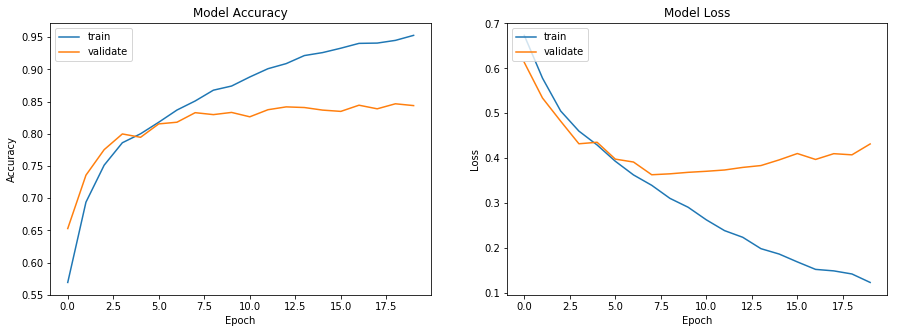

In [ ]:
import matplotlib.pyplot as plt

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['acc']) 
    axs[0].plot(history.history['val_acc']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(96, 96))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,96,96,1)
X_test = X_test/255

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predicted_val = [int(round(p[0])) for p in predictions]

In [ ]:
print(predicted_val)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
print(len(predicted_val))

12500


In [ ]:
pred_val_name = []
x = 0
for x in range(len(predicted_val)):
    if predicted_val[x] == 1:
        pred_val_name.append('dog')
    else:
        pred_val_name.append('cat')

In [ ]:
print(pred_val_name)

['cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog'

In [ ]:
submission_df = pd.DataFrame({'id':id_line, 'label':pred_val_name})

In [ ]:
submission_df.to_csv("submission.csv", index=False)